# Exploratory Data Analysis of SF Crime OpenData

To learn more about the data please follow the link below:
#### https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
import requests
import pandas as pd

In [2]:
# Define the URL of the OpenData API endpoint
api_url = "https://data.sfgov.org/resource/wg3w-h783.json"
limit = 50000 # Number of records per request
offset = 0    # Initial offset value

# Initialize an empty list to store data
all_data = []

# Loop until all records are fetched
while True:
    # Send a GET request to the API endpoint with the current offset
    new_api_url = f"{api_url}?$limit={limit}&$offset={offset}"
    #print(new_api_url)
    response = requests.get(new_api_url)
    
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Convert the response JSON data to a Python dictionary
        data_dict = response.json()
        
        # Check if data is returned
        if len(data_dict) == 0:
            # No more data available, exit the loop
            break
        
        # Append the fetched data to the list
        all_data.extend(data_dict)
        
        # Increment the offset for the next request
        #offset += 50000
        break
    else:
        print("Failed to retrieve data from the API endpoint. Status code:", response.status_code)
        break

# Convert the list of dictionaries to a pandas DataFrame
data = pd.DataFrame(all_data)

# Perform further data processing or analysis as needed
# Example:
print("Number of records fetched:", len(data))


Number of records fetched: 50000


In [4]:
data.dtypes

incident_datetime              object
incident_date                  object
incident_time                  object
incident_year                  object
incident_day_of_week           object
report_datetime                object
row_id                         object
incident_id                    object
incident_number                object
report_type_code               object
report_type_description        object
incident_code                  object
incident_category              object
incident_subcategory           object
incident_description           object
resolution                     object
police_district                object
filed_online                   object
cad_number                     object
intersection                   object
cnn                            object
analysis_neighborhood          object
supervisor_district            object
supervisor_district_2012       object
latitude                       object
longitude                      object
point       

In [3]:
data.head()

,incident_datetime,incident_date,incident_time,incident_year,incident_day_of_week,report_datetime,row_id,incident_id,incident_number,report_type_code,...,latitude,longitude,point,:@computed_region_26cr_cadq,:@computed_region_qgnn_b9vv,:@computed_region_jwn9_ihcz,:@computed_region_h4ep_8xdi,:@computed_region_nqbw_i6c3,:@computed_region_n4xg_c4py,:@computed_region_jg9y_a9du
0,2023-03-13T23:41:00.000,2023-03-13T00:00:00.000,23:41,2023,Monday,2023-03-13T23:41:00.000,125373607041,1253736,230167874,VS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-03-01T05:02:00.000,2023-03-01T00:00:00.000,05:02,2023,Wednesday,2023-03-11T15:40:00.000,125379506374,1253795,236046151,II,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-03-13T13:16:00.000,2023-03-13T00:00:00.000,13:16,2023,Monday,2023-03-13T13:17:00.000,125357107041,1253571,220343896,VS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-03-13T10:59:00.000,2023-03-13T00:00:00.000,10:59,2023,Monday,2023-03-13T11:00:00.000,125355107041,1253551,230174885,VS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-03-14T18:44:00.000,2023-03-14T00:00:00.000,18:44,2023,Tuesday,2023-03-14T18:45:00.000,125402407041,1254024,230176728,VS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.tail()

,incident_datetime,incident_date,incident_time,incident_year,incident_day_of_week,report_datetime,row_id,incident_id,incident_number,report_type_code,...,latitude,longitude,point,:@computed_region_26cr_cadq,:@computed_region_qgnn_b9vv,:@computed_region_jwn9_ihcz,:@computed_region_h4ep_8xdi,:@computed_region_nqbw_i6c3,:@computed_region_n4xg_c4py,:@computed_region_jg9y_a9du
49995,2023-09-29T18:12:00.000,2023-09-29T00:00:00.000,18:12,2023,Friday,2023-09-29T18:15:00.000,132370303011,1323703,230701278,II,...,37.79377985665411,-122.40295736135474,"{'type': 'Point', 'coordinates': [-122.4029573...",3,6,108,NaN,NaN,NaN,NaN
49996,2023-09-30T11:30:00.000,2023-09-30T00:00:00.000,11:30,2023,Saturday,2023-09-30T12:14:00.000,132389606244,1323896,230702652,II,...,37.777490366353746,-122.43321873935555,"{'type': 'Point', 'coordinates': [-122.4332187...",11,4,23,NaN,NaN,NaN,NaN
49997,2023-09-30T00:01:00.000,2023-09-30T00:00:00.000,00:01,2023,Saturday,2023-09-30T03:24:00.000,132378774000,1323787,230702298,II,...,37.77456748108749,-122.44111041853978,"{'type': 'Point', 'coordinates': [-122.4411104...",11,7,24,NaN,NaN,NaN,NaN
49998,2023-09-30T04:03:00.000,2023-09-30T00:00:00.000,04:03,2023,Saturday,2023-09-30T04:03:00.000,132397428160,1323974,230702301,IS,...,37.78117721773047,-122.41169993118794,"{'type': 'Point', 'coordinates': [-122.4116999...",10,5,20,1,1,1,NaN
49999,2023-09-30T19:00:00.000,2023-09-30T00:00:00.000,19:00,2023,Saturday,2023-09-30T19:38:00.000,132399162050,1323991,230703779,II,...,37.77537245126671,-122.50481635778848,"{'type': 'Point', 'coordinates': [-122.5048163...",4,8,8,NaN,NaN,NaN,NaN


In [5]:
data.describe(include='all').T

,count,unique,top,freq
incident_datetime,50000,28319,2023-04-01T00:00:00.000,33
incident_date,50000,1379,2023-04-01T00:00:00.000,441
incident_time,50000,1440,00:00,1883
incident_year,50000,7,2023,45971
incident_day_of_week,50000,7,Friday,7755
report_datetime,50000,37303,2023-09-29T00:00:00.000,18
row_id,50000,50000,125373607041,1
incident_id,50000,42432,1280913,4
incident_number,50000,38368,190202001,40
report_type_code,50000,4,II,38414


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   incident_datetime            50000 non-null  object
 1   incident_date                50000 non-null  object
 2   incident_time                50000 non-null  object
 3   incident_year                50000 non-null  object
 4   incident_day_of_week         50000 non-null  object
 5   report_datetime              50000 non-null  object
 6   row_id                       50000 non-null  object
 7   incident_id                  50000 non-null  object
 8   incident_number              50000 non-null  object
 9   report_type_code             50000 non-null  object
 10  report_type_description      50000 non-null  object
 11  incident_code                50000 non-null  object
 12  incident_category            49923 non-null  object
 13  incident_subcategory         49

In [8]:
data.isnull().sum()

incident_datetime                  0
incident_date                      0
incident_time                      0
incident_year                      0
incident_day_of_week               0
report_datetime                    0
row_id                             0
incident_id                        0
incident_number                    0
report_type_code                   0
report_type_description            0
incident_code                      0
incident_category                 77
incident_subcategory              77
incident_description               0
resolution                         0
police_district                    0
filed_online                   38608
cad_number                     13452
intersection                    5047
cnn                             5047
analysis_neighborhood           5047
supervisor_district             5077
supervisor_district_2012        5058
latitude                        5047
longitude                       5047
point                           5047
:

In [9]:
(data.isnull().sum()/(len(data)))*100

incident_datetime               0.000
incident_date                   0.000
incident_time                   0.000
incident_year                   0.000
incident_day_of_week            0.000
report_datetime                 0.000
row_id                          0.000
incident_id                     0.000
incident_number                 0.000
report_type_code                0.000
report_type_description         0.000
incident_code                   0.000
incident_category               0.154
incident_subcategory            0.154
incident_description            0.000
resolution                      0.000
police_district                 0.000
filed_online                   77.216
cad_number                     26.904
intersection                   10.094
cnn                            10.094
analysis_neighborhood          10.094
supervisor_district            10.154
supervisor_district_2012       10.116
latitude                       10.094
longitude                      10.094
point       

In [11]:
data = data.drop([':@computed_region_26cr_cadq',':@computed_region_qgnn_b9vv', ':@computed_region_jwn9_ihcz'], axis = 1)
data = data.drop([':@computed_region_h4ep_8xdi',':@computed_region_nqbw_i6c3', ':@computed_region_n4xg_c4py'], axis = 1)
data = data.drop([':@computed_region_jg9y_a9du'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   incident_datetime         50000 non-null  object
 1   incident_date             50000 non-null  object
 2   incident_time             50000 non-null  object
 3   incident_year             50000 non-null  object
 4   incident_day_of_week      50000 non-null  object
 5   report_datetime           50000 non-null  object
 6   row_id                    50000 non-null  object
 7   incident_id               50000 non-null  object
 8   incident_number           50000 non-null  object
 9   report_type_code          50000 non-null  object
 10  report_type_description   50000 non-null  object
 11  incident_code             50000 non-null  object
 12  incident_category         49923 non-null  object
 13  incident_subcategory      49923 non-null  object
 14  incident_description  

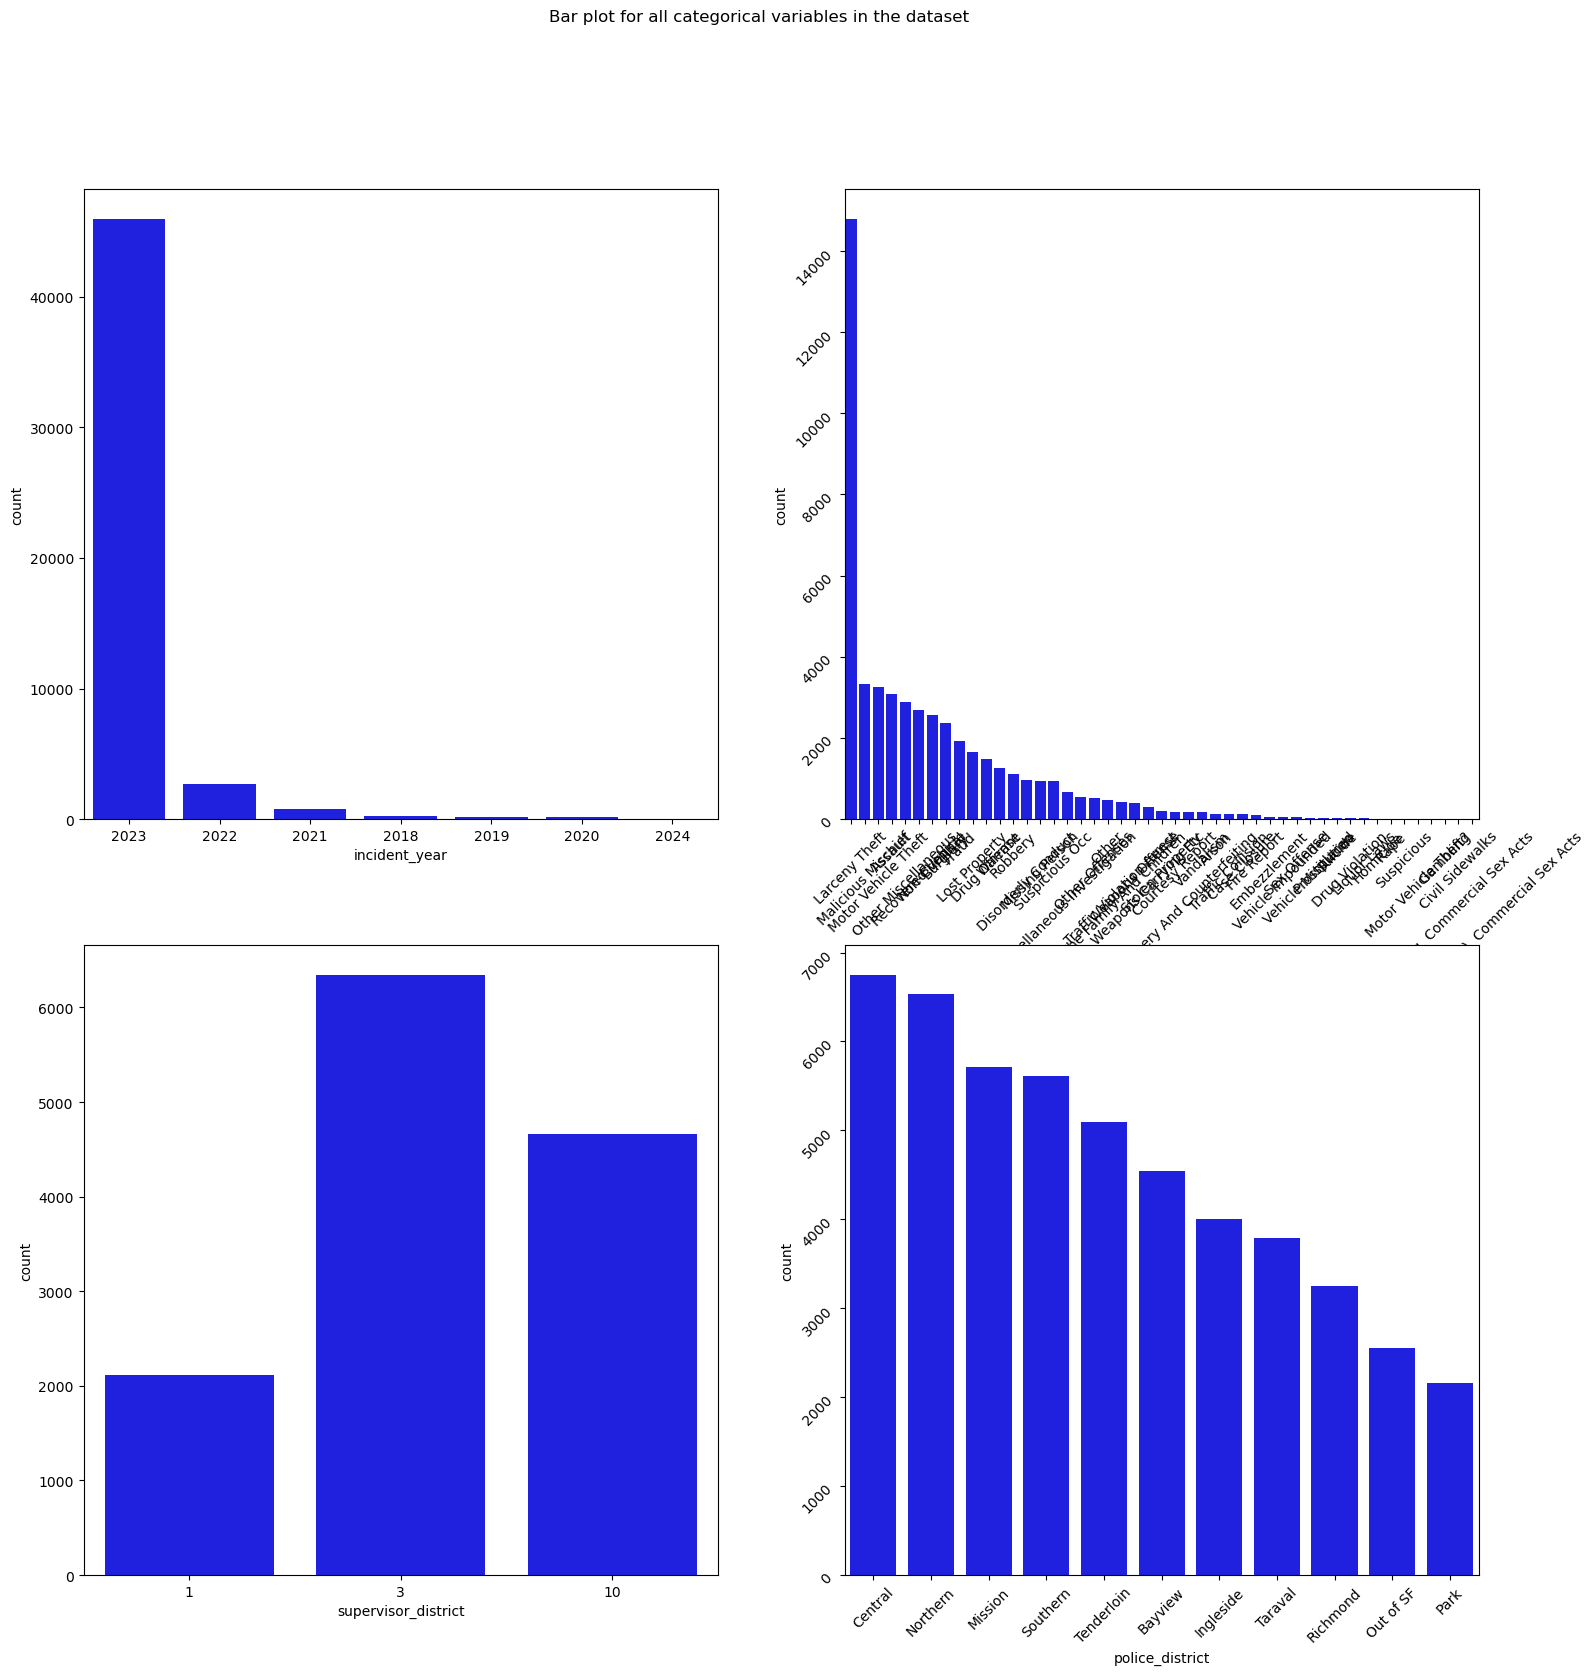

In [20]:
fig, axes = plt.subplots(2, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'incident_year', data = data, color = 'blue', 
              order = data['incident_year'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'incident_category', data = data, color = 'blue', 
              order = data['incident_category'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'police_district', data = data, color = 'blue', 
              order = data['police_district'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'supervisor_district', data = data, color = 'blue', 
              order = data['supervisor_district'].head(20).value_counts().index);
axes[0][1].tick_params(labelrotation=45);
axes[1][1].tick_params(labelrotation=45);